# Assignment 03

##### 1. Input points

plot a set of points $\{ (x^{(i)}, y^{(i)})\}$ that are loaded from 'data.csv' file (in black color)\

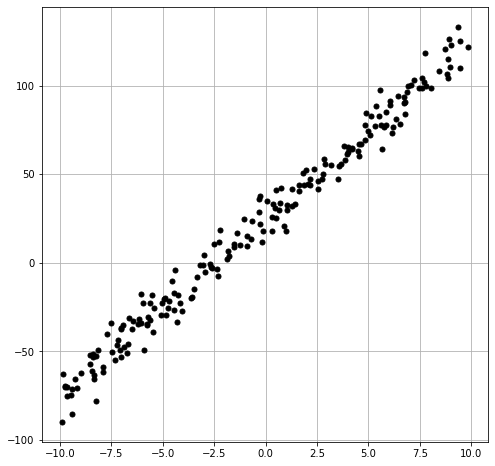

In [19]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.plot(x_data, y_data, 'ko', linewidth=0, markersize=5)
plt.grid()
plt.show()


##### 2. linear regression result 
plot a set of points $\{ (x^{(i)}, y^{(i)}) \}$ that are loaded from 'data.csv' file (in black color)

plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)

the estimated straight line (linear function) is superimposed on the set of points


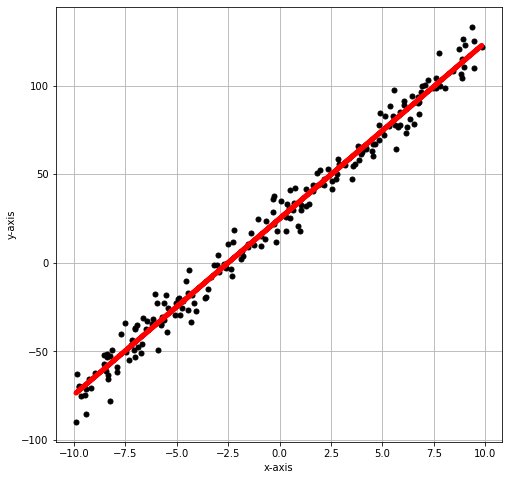

theta_0 = 24.9074
theta_1 = 9.9346


In [20]:
m = len(x_data)

x = x_data
y = y_data

# calculate linear regression parameters
theta0 = (sum(y)*sum(x**2) - sum(x)*sum(x*y)) / ( m * sum(x**2) - sum(x)**2)
theta1 = (m*sum(x*y) - sum(x)*sum(y))/ ( m * sum( x**2 ) - sum(x)**2)



# plot the figure
plt.figure(figsize=(8, 8))
plt.plot(x,y,'ko', linewidth=0, markersize=5)
plt.plot(x, theta0 + theta1 * x,'r', linewidth=5)
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.grid()
plt.show()

# print out the value of theta
print('theta_0 = %.4f' % theta0)
print('theta_1 = %.4f' % theta1)


##### 3. Plot the energy surface
plot the energy surface $(\theta_0, \theta_1, J(\theta_0, \theta_1))$ with the range of variables $\theta_0 = [-30 : 0.1 : 30]$ and $\theta_1 = [-30 : 0.1 : 30]$



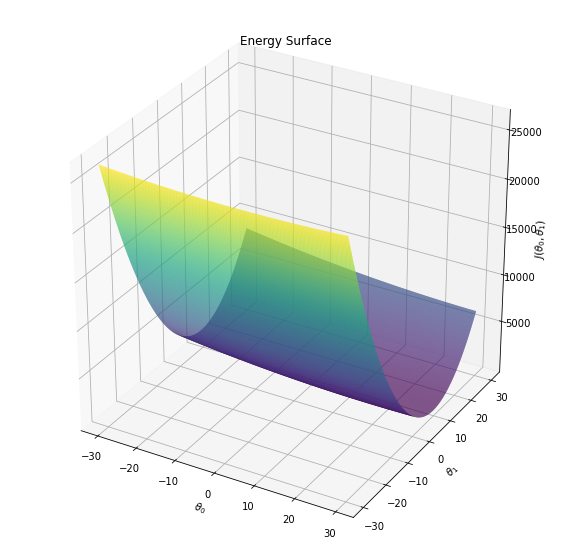

In [25]:
def f(theta0, theta1):
    total = 0
    for i in range(m):
        total += (theta0 + theta1*x[i] - y[i])**2
    return total/(2*m)

theta0 = np.arange(-30,30,0.1)
theta1 = np.arange(-30,30,0.1)

X, Y = np.meshgrid(theta0, theta1)
Z = f(X, Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Energy Surface')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta_0,\\theta_1)$');
plt.show()


##### 4. Plot the gradient descent path on the energy surface
- plot the energy surface $(\theta_0, \theta_1, J(\theta_0, \theta_1))$ with the range of variables $\theta_0 = [-30 : 0.1 : 30]$ and $\theta_1 = [-30 : 0.1 : 30]$
- plot the energy value with the updated variables $\theta_0^{(t)}$ and $\theta_1^{(t)}$ at each gradient descent step on the energy surface
- the initial condition is used by $\theta_0^{(0)} = -30$ and $\theta_1^{(0)} = -30$ 
- the gradient descent is performed until the convergence is achieved
- the gradient descent path is superimposed on the energy surface



In [22]:
# create lists to collect information for plot
col_theta0 = []
col_theta1 = []
col_MSE = []

# learning rate
alpha = 0.01

# theta_0 and theta_1 initial
theta0 = -30; theta1 = -30

total1 = 0
for i in range(m):
    total1 += (theta0 + theta1*x[i] - y[i])**2
  
col_MSE.append(1/(2*m)*total1)
col_theta0.append(theta0)
col_theta1.append(theta1)

MSE = 0

while(True):
  total1 = 0; total2 = 0; total3 = 0
  for i in range(m):
    total2 += theta0 + theta1 * x[i] - y[i]
    total3 += (theta0 + theta1 * x[i] -  y[i])*x[i]
      
  theta0 = theta0 - alpha*total2/m
  theta1 = theta1 - alpha*total3/m
  
  for i in range(m):
    total1 += (theta0 + theta1 * x[i] - y[i])**2
  
  col_MSE.append(1/(2*m)*total1)
  col_theta0.append(theta0)
  col_theta1.append(theta1)
  
  if abs(MSE - 1/(2*m)*total1) < 10**-5: 
      break
  else: 
      MSE = 1/(2*m)*total1
  
# print out the value
print('theta_0 = %.4f' % theta0)
print('theta_1 = %.4f' % theta1)
print('MSE = %.4f' % MSE)

theta_0 = 24.8758
theta_1 = 9.9341
MSE = 27.4680


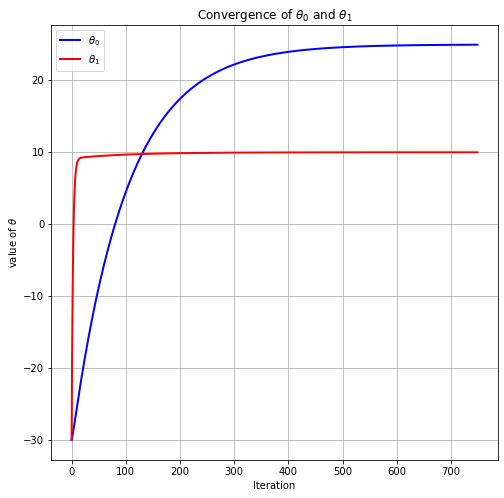

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(col_theta0, 'b-', linewidth=2, markersize=5)
plt.plot(col_theta1, 'r-', linewidth=2, markersize=5)
plt.ylabel('value of $\\theta$')
plt.xlabel('Iteration')
plt.legend(['$\\theta_0$','$\\theta_1$'])
plt.grid()
plt.title('Convergence of $\\theta_0$ and $\\theta_1$')
plt.show()


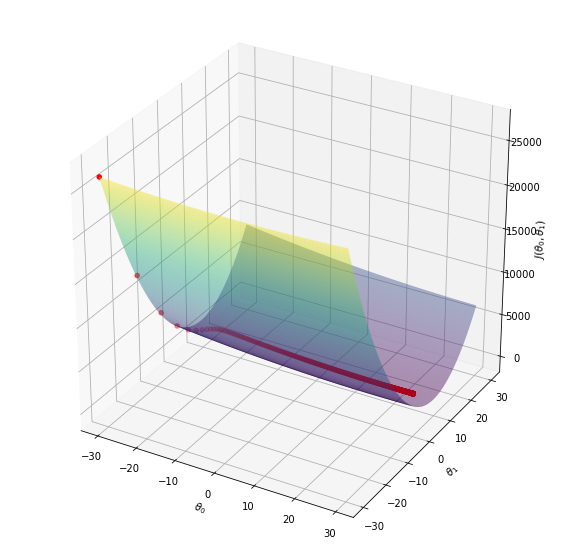

In [26]:
fig1 = plt.figure(figsize=(10,10))
ax1 = plt.axes(projection='3d')
ax1.plot_surface(X, Y, Z, alpha=0.5, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax1.scatter(col_theta0, col_theta1, col_MSE, c='red')
ax.set_title('Energy Surface')
ax1.set_xlabel('$\\theta_0$')
ax1.set_ylabel('$\\theta_1$')
ax1.set_zlabel('$J(\\theta_0,\\theta_1)$')
plt.show()

The linear model of 'data.csv' is 

$h_\theta(x)=\theta_0 + \theta_1x$  where $\theta_0 = 24.8758$ ,  $\theta_1 = 9.9341$ and $MSE = 27.4680$

